In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [22]:
# Load dataset (replace with your dataset path)
df = pd.read_csv("credit_scoring_dataset.csv")
df.head(5)


,income,age,dependents,current_debt,late_30,late_60,late_90,credit_utilization,credit_history_years,employment_status,housing,city_tier,dti,creditworthy
0,389762,56,3,71759,0,0,0,0.224173,8.983941,salaried,own,tier1,0.184111,1
1,236150,24,0,23864,1,0,0,0.199842,7.995323,salaried,own,tier1,0.101058,1
2,706116,24,1,70408,0,0,0,0.094780,4.644370,salaried,rent,tier1,0.099712,1
3,365675,22,0,32876,1,1,0,0.511413,9.966933,salaried,rent,tier2,0.089906,0
4,621201,25,1,80144,1,0,0,0.276337,7.468403,self_employed,own,tier2,0.129015,1


In [23]:

# Encode categorical variables
df = pd.get_dummies(df, drop_first=True)
# Handle missing values (if any)
df.fillna(df.median(), inplace=True)


# Separate features and target
X = df.drop('creditworthy', axis=1)  # target column name assumed
y = df['creditworthy']

# Split data into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numeric features
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [24]:
df

,income,age,dependents,current_debt,late_30,late_60,late_90,credit_utilization,credit_history_years,dti,creditworthy,employment_status_self_employed,employment_status_student,employment_status_unemployed,housing_own,housing_rent,city_tier_tier2,city_tier_tier3
0,389762,56,3,71759,0,0,0,0.224173,8.983941,0.184111,1,False,False,False,True,False,False,False
1,236150,24,0,23864,1,0,0,0.199842,7.995323,0.101058,1,False,False,False,True,False,False,False
2,706116,24,1,70408,0,0,0,0.094780,4.644370,0.099712,1,False,False,False,False,True,False,False
3,365675,22,0,32876,1,1,0,0.511413,9.966933,0.089906,0,False,False,False,False,True,True,False
4,621201,25,1,80144,1,0,0,0.276337,7.468403,0.129015,1,True,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,570074,68,0,21016,0,0,0,0.365918,4.903573,0.036867,1,True,False,False,False,True,True,False
4996,622833,23,0,83276,0,0,0,0.287095,6.080423,0.133706,1,False,False,False,True,False,False,False
4997,481108,34,3,25291,0,0,0,0.277175,14.446867,0.052570,1,True,False,False,False,True,True,False
4998,343599,40,1,42670,0,0,0,0.338316,8.675538,0.124186,0,False,False,True,True,False,True,False


In [25]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_test)


In [26]:
tree_model = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_model.fit(X_train, y_train)
tree_pred = tree_model.predict(X_test)


In [27]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)


Logistic Regression:
               precision    recall  f1-score   support

           0       0.71      0.77      0.74       551
           1       0.69      0.62      0.65       449

    accuracy                           0.70      1000
   macro avg       0.70      0.69      0.69      1000
weighted avg       0.70      0.70      0.70      1000

Decision Tree:
               precision    recall  f1-score   support

           0       0.70      0.74      0.72       551
           1       0.66      0.60      0.63       449

    accuracy                           0.68      1000
   macro avg       0.68      0.67      0.67      1000
weighted avg       0.68      0.68      0.68      1000

Random Forest:
               precision    recall  f1-score   support

           0       0.71      0.76      0.73       551
           1       0.68      0.61      0.64       449

    accuracy                           0.70      1000
   macro avg       0.69      0.69      0.69      1000
weighted avg       0

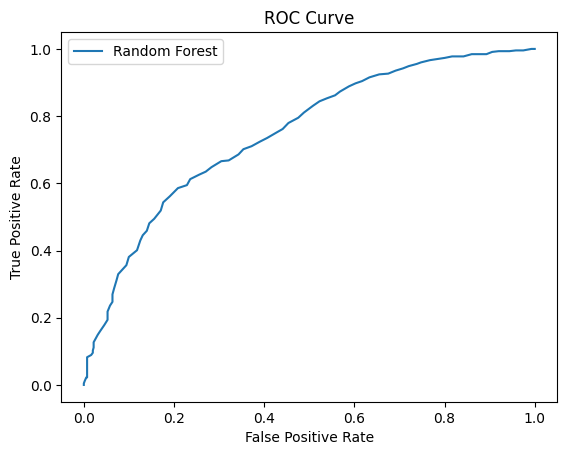

In [28]:
# Logistic Regression Evaluation
print("Logistic Regression:\n", classification_report(y_test, log_pred))

# Decision Tree Evaluation
print("Decision Tree:\n", classification_report(y_test, tree_pred))

# Random Forest Evaluation
print("Random Forest:\n", classification_report(y_test, rf_pred))

# ROC-AUC Score for Random Forest
rf_probs = rf_model.predict_proba(X_test)[:,1]
print("ROC-AUC Score (Random Forest):", roc_auc_score(y_test, rf_probs))

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, rf_probs)
plt.plot(fpr, tpr, label="Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


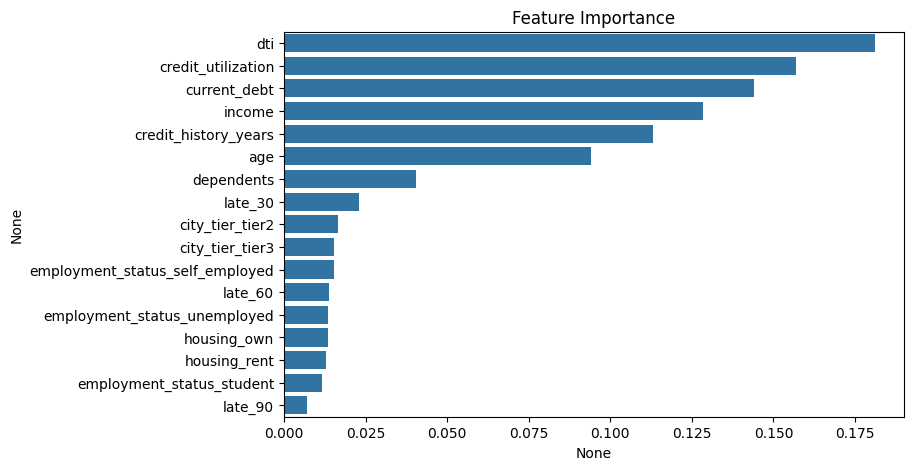

In [20]:
importances = rf_model.feature_importances_
feature_names = df.drop('creditworthy', axis=1).columns
feature_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.title("Feature Importance")
plt.show()
